Connected to aula2amb (Python 3.12.2)

### Extração de dados tratados para análise 

In [29]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import geopandas as gpd
import matplotlib.pyplot as plt


In [30]:
dt_vinho = pd.read_csv("out_dt\ExpVinhoMesa.csv", sep=',', encoding='UTF-8')
select_wanted = ['pais','ano','quant_kg','valor_us$','tipo']
dt_vinho[select_wanted].head(5)

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\estev\AppData\Local\Temp\ipykernel_13428\877116921.py:1: SyntaxWarning: invalid escape sequence '\E'
  dt_vinho = pd.read_csv("out_dt\ExpVinhoMesa.csv", sep=',', encoding='UTF-8')


,pais,ano,quant_kg,valor_us$,tipo
0,Afeganistão,2009,0,0,Vinhos de mesa
1,África do Sul,2009,0,0,Vinhos de mesa
2,"Alemanha, República Democrática",2009,225086,393482,Vinhos de mesa
3,Angola,2009,54786,84235,Vinhos de mesa
4,Anguilla,2009,0,0,Vinhos de mesa


### total de exportações dentre os anos 


In [31]:
# transformar em float 
# alterar o dado numerico 000.000.000,00

In [32]:
dt_vinho[select_wanted].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pais       2055 non-null   object
 1   ano        2055 non-null   int64 
 2   quant_kg   2055 non-null   int64 
 3   valor_us$  2055 non-null   int64 
 4   tipo       2055 non-null   object
dtypes: int64(3), object(2)
memory usage: 80.4+ KB


In [33]:
dt = dt_vinho[select_wanted]
dt['pais'] = dt['pais'].astype('str')
dt['tipo'] = dt['tipo'].astype('str')
print(dt.info())
dt.head(4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pais       2055 non-null   object
 1   ano        2055 non-null   int64 
 2   quant_kg   2055 non-null   int64 
 3   valor_us$  2055 non-null   int64 
 4   tipo       2055 non-null   object
dtypes: int64(3), object(2)
memory usage: 80.4+ KB
None


C:\Users\estev\AppData\Local\Temp\ipykernel_13428\4233359548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['pais'] = dt['pais'].astype('str')
C:\Users\estev\AppData\Local\Temp\ipykernel_13428\4233359548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['tipo'] = dt['tipo'].astype('str')


,pais,ano,quant_kg,valor_us$,tipo
0,Afeganistão,2009,0,0,Vinhos de mesa
1,África do Sul,2009,0,0,Vinhos de mesa
2,"Alemanha, República Democrática",2009,225086,393482,Vinhos de mesa
3,Angola,2009,54786,84235,Vinhos de mesa


### Grafico de exportacao ao longo dos anos 

In [77]:
dt_sum_paises = dt.groupby(by='pais').sum().drop(columns=['ano', 'tipo'])
dt_sem_export = dt[dt['quant_kg'] + dt['valor_us$'] == 0]
dt_com_export = dt[dt['quant_kg'] + dt['valor_us$'] == 0]
dt_sum_anos = dt.groupby(by='ano').sum().drop(columns=['pais', 'tipo'])
dt_sem_russia = dt[dt['pais'] != 'Rússia']
dt_sum_paises_sem_russia = dt_sem_russia.groupby(by='ano').sum().drop(columns=['pais', 'tipo'])
dt_sum_paises_sem_russia


,quant_kg,valor_us$
ano,,
2009,3601284,3208708
2010,1280574,2595303
2011,1214834,3615120
2012,1247200,3417325
2013,3255768,7949151
2014,2133373,7411355
2015,1150815,2750920
2016,1786549,4434704
2017,2889572,7135607


### Tratativas

In [84]:



dt_sum_anos['valor_us$'] = dt_sum_anos['valor_us$'].astype('float')
dt_vendas = dt_sum_anos.drop(columns=['quant_kg'])
dt_vendas['ano'] = dt_vendas.index
dt_vendas

dt_sum_paises_sem_russia['valor_us$'] = dt_sum_paises_sem_russia['valor_us$'].astype('float')
dt_vendas_sem_russia = dt_sum_paises_sem_russia.drop(columns=['quant_kg'])
dt_vendas_sem_russia['ano'] = dt_vendas_sem_russia.index
dt_vendas_sem_russia

dt_sum_paises['valor_us$'] = dt_sum_paises['valor_us$'].astype('float')
pd.options.display.float_format = lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
dt_vendas_pais = dt_sum_paises.drop(columns=['quant_kg'])
dt_vendas_pais['pais'] = dt_vendas_pais.index
dt_vendas_pais

,valor_us$,pais
pais,,
Afeganistão,"46,00",Afeganistão
"Alemanha, República Democrática","2.148.277,00","Alemanha, República Democrática"
Angola,"505.106,00",Angola
Anguilla,"0,00",Anguilla
Antilhas Holandesas,"120.007,00",Antilhas Holandesas
...,...,...
Vanuatu,"31,00",Vanuatu
Venezuela,"309.340,00",Venezuela
Vietnã,"13.141,00",Vietnã


In [89]:
from scipy import stats

# Calcular o Z-Score para cada valor de vendas
dt_vendas_pais['Z-Score'] = np.abs(stats.zscore(dt_vendas_pais['valor_us$']))

# Identificar outliers
outliers = dt_vendas_pais[dt_vendas_pais['Z-Score'] > 3]
print("Outliers:\n", outliers)

dt_sem_outlier = dt_vendas_pais[dt_vendas_pais['Z-Score'] < 3]
dt_sem_outlier['valor_us$'].to_csv("exportacao_paises.csv")

Outliers:
              valor_us$      pais  Z-Score
pais                                     
Paraguai 42.862.206,00  Paraguai     9,91
Rússia   23.151.716,00    Rússia     5,26


### Analise exportações com russia 

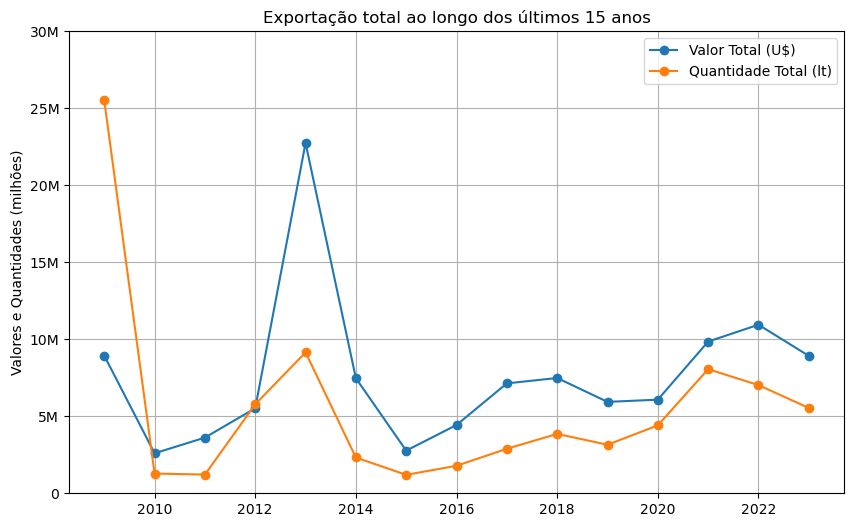

In [ ]:

# Criando uma figura e um eixo no matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores
ax.plot(dt_sum_anos.index, dt_sum_anos['valor_us$'], label='Valor Total (U$)', marker='o')
ax.plot(dt_sum_anos.index, dt_sum_anos['quant_kg'], label='Quantidade Total (lt)', marker='o')

# Adicionando título e rótulos
ax.set_title('Exportação total ao longo dos últimos 15 anos')
ax.set_ylabel('Valores e Quantidades (milhões)')

# Definindo os limites do eixo y
ax.set_ylim(0, 30000000)

# Configurando os rótulos do eixo y para mostrar valores de 0 a 30.000.000
# Pode ajustar os intervalos conforme necessário
ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000])
ax.set_yticklabels(['0', '5M', '10M', '15M', '20M', '25M', '30M'])

# Adicionando legenda
ax.legend()

plt.grid(True)
# Mostrando o gráfico
fig.savefig("grafico1.png")

plt.show()

0,25   4.977.998,50
0,50   7.135.607,00
0,75   8.932.032,00
Name: valor_us$, dtype: float64


<Axes: title={'center': 'Anos'}, xlabel='Valor'>

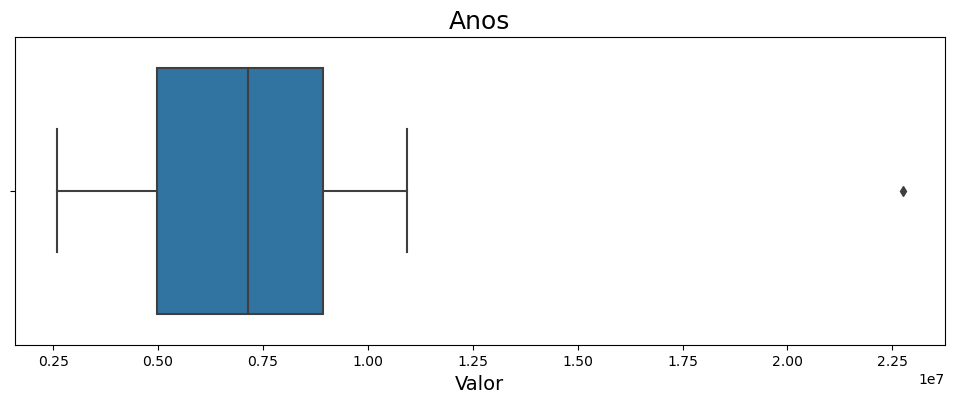

In [62]:
ax = sns.boxplot(x = 'valor_us$', data = dt_sum_anos, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos', fontsize=18)
ax.set_xlabel('Valor', fontsize=14)


print(dt_sum_anos['valor_us$'].quantile([0.25, 0.5, 0.75]))
ax

In [72]:
from scipy import stats

# Calcular o Z-Score para cada valor de vendas
dt_vendas['Z-Score'] = np.abs(stats.zscore(dt_vendas['valor_us$']))

# Identificar outliers
outliers = dt_vendas[dt_vendas['Z-Score'] > 3]
print("Outliers:\n", outliers)

Outliers:
          valor_us$   ano  Z-Score
ano                              
2013 22.744.845,00  2013     3,21


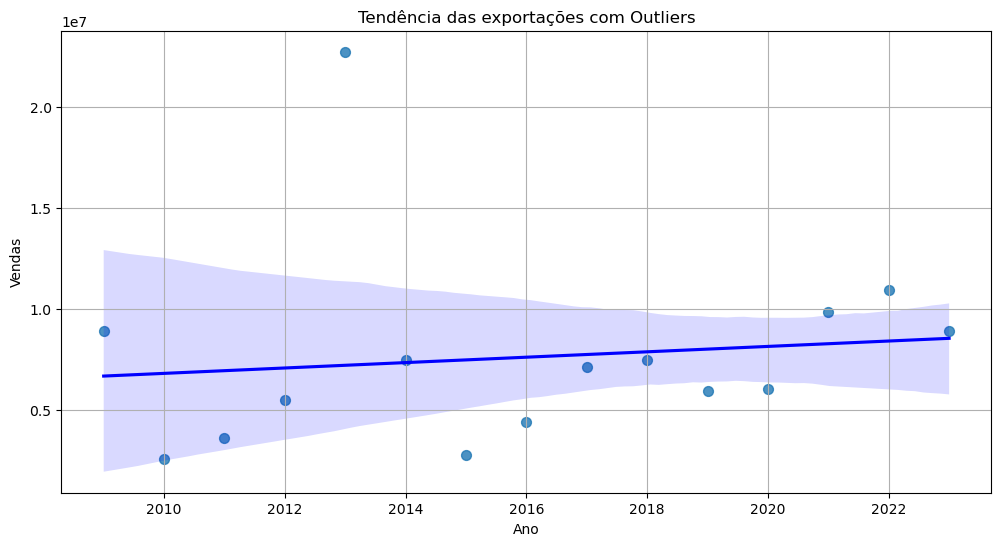

In [73]:
# Plotar a tendência com outliers
plt.figure(figsize=(12, 6))
sns.regplot(x='ano', y='valor_us$', data=dt_vendas, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Tendência das exportações com Outliers')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

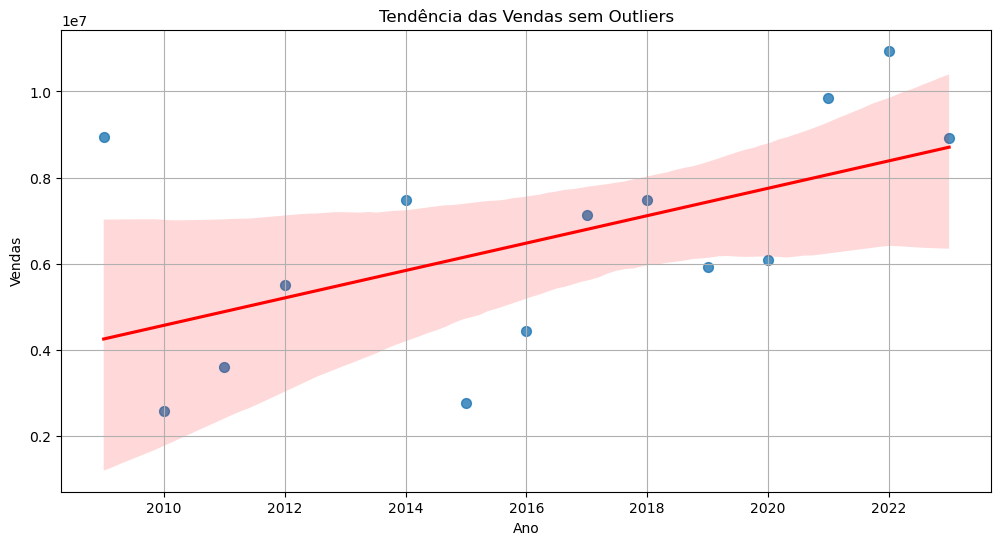

In [75]:
# Remover outliers
df_no_outliers = dt_vendas[dt_vendas['Z-Score'] <= 3]

# Plotar a tendência sem outliers
plt.figure(figsize=(12, 6))
sns.regplot(x='ano', y='valor_us$', data=df_no_outliers, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Tendência das Vendas sem Outliers')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

### Análises exportações sem russia

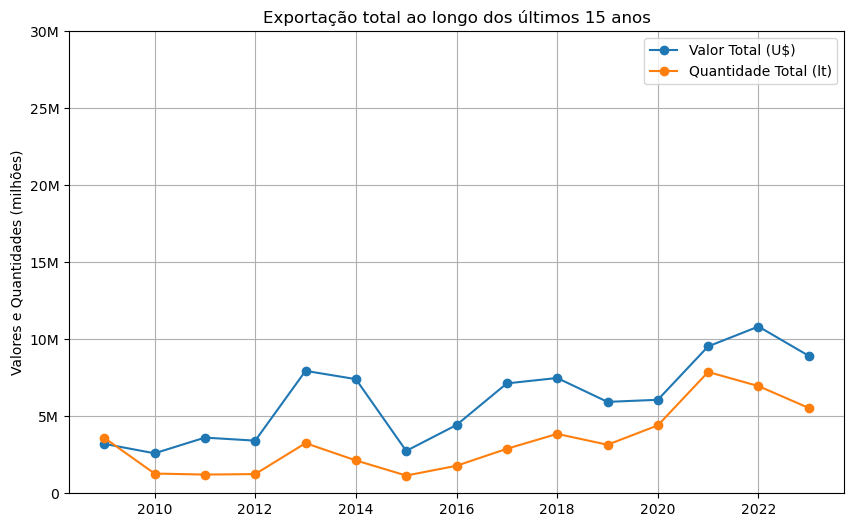

In [78]:
# Criando uma figura e um eixo no matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores
ax.plot(dt_sum_paises_sem_russia.index, dt_sum_paises_sem_russia['valor_us$'], label='Valor Total (U$)', marker='o')
ax.plot(dt_sum_paises_sem_russia.index, dt_sum_paises_sem_russia['quant_kg'], label='Quantidade Total (lt)', marker='o')

# Adicionando título e rótulos
ax.set_title('Exportação total ao longo dos últimos 15 anos')
ax.set_ylabel('Valores e Quantidades (milhões)')

# Definindo os limites do eixo y
ax.set_ylim(0, 30000000)

# Configurando os rótulos do eixo y para mostrar valores de 0 a 30.000.000
# Pode ajustar os intervalos conforme necessário
ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000])
ax.set_yticklabels(['0', '5M', '10M', '15M', '20M', '25M', '30M'])

# Adicionando legenda
ax.legend()

plt.grid(True)
# Mostrando o gráfico
fig.savefig("grafico1.png")

plt.show()

0,25   3.516.222,50
0,50   6.069.738,00
0,75   7.717.607,00
Name: valor_us$, dtype: float64


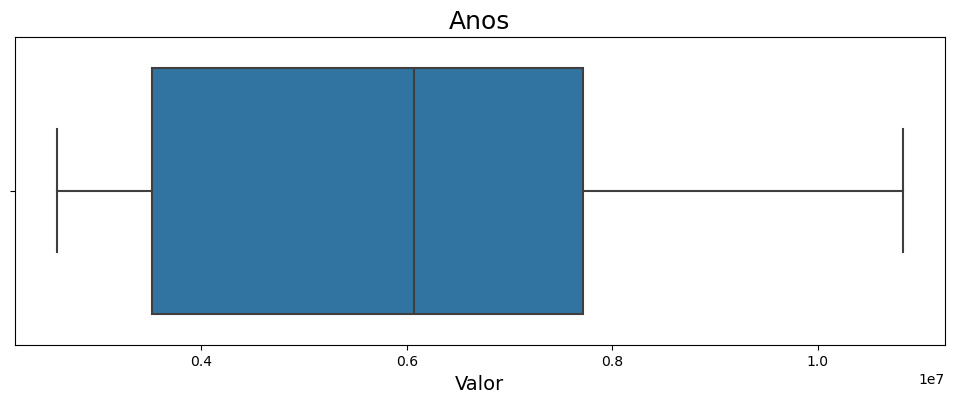

In [80]:
ax = sns.boxplot(x = 'valor_us$', data = dt_sum_paises_sem_russia, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos', fontsize=18)
ax.set_xlabel('Valor', fontsize=14)


print(dt_sum_paises_sem_russia['valor_us$'].quantile([0.25, 0.5, 0.75]))

In [82]:

# Calcular o Z-Score para cada valor de vendas
dt_vendas_sem_russia['Z-Score'] = np.abs(stats.zscore(dt_vendas_sem_russia['valor_us$']))

# Identificar outliers
outliers = dt_vendas_sem_russia[dt_vendas_sem_russia['Z-Score'] > 3]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [valor_us$, ano, Z-Score]
Index: []


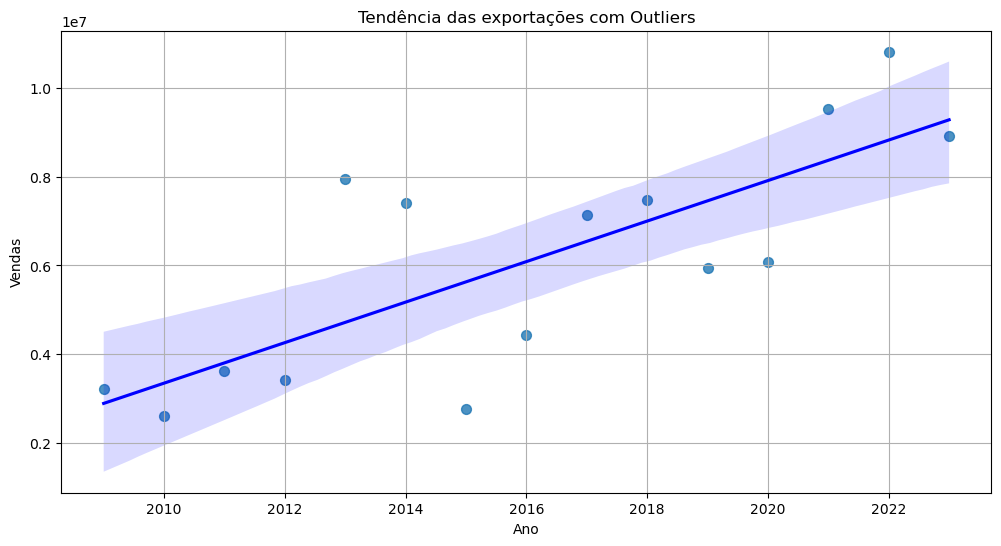

In [83]:
# Plotar a tendência com outliers
plt.figure(figsize=(12, 6))
sns.regplot(x='ano', y='valor_us$', data=dt_vendas_sem_russia, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Tendência das exportações retirado Russia')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()